<div style = "text-align: center; color: black; font-family: Times New Roman;">
  <strong><h1>NASDAQ MULTIPLE LINEAR REGRESSION<strong></h1>
</div>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  We will proceed running a Multiple Linear Regression analysis on the dependent variable NASDAQ. We will begin by setting the libraries that we will use in this analysis:
</p>

<div style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  <ul style="display: inline-block; text-align: left;">
    <li><strong>import pandas as pd</strong>: loading in data and working with pandas data frames</li>
    <li><strong>import matplotlib.pyplot as plt</strong>: Actual vs Predicted and Residual Plots</li>
    <li><strong>import statsmodels.api as sm</strong>: conduct the OLS model</li>
    <li><strong>from sklearn.model_selection import train_test_split</strong>: split our data into test/train using shuffle = False due to time-series data</li>
    <li><strong>from sklearn.metrics import mean_squared_error</strong>: calculate MSE and RMSE scores</li>
    <li><strong>import seaborn as sns</strong>: correlation matrix plot</li>
  </ul>
</div>

In [9]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
import seaborn as sns 

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  Then, we will load in our data and rename column names for easier and more descriptive analysis. 
</p>

In [10]:
# Load in the data
data = pd.read_csv('merged_data.csv')

# rename columns
data.rename(columns={'CPALWE01USQ661N': 'CPI', 'S&P 500 ^GSPC': 'S&P_500', 'NASDAQ ^IXIC': 'NASDAQ', 'Dow Jones ^DJI':'Dow_Jones', 'RealInterestRate':'Real_IR', 'UnemploymentRate': 'Unemployment_Rate', 'FedFundsRate': 'Federal_Funds_Rate'}, inplace = True)
data.head(10)

,Date,S&P_500,NASDAQ,Dow_Jones,CPI,Real_IR,Unemployment_Rate,GDP_Growth,M2_Supply,Federal_Funds_Rate
0,1992-01-01,408.779999,620.210022,3223.399902,58.870052,3.198542,7.3,4.9,3398.6,4.03
1,1992-04-01,414.950012,578.679993,3359.100098,59.387717,3.789860,7.4,4.4,3434.1,3.73
2,1992-07-01,424.209991,580.830017,3393.800049,59.862244,3.353099,7.7,4.0,3407.1,3.25
3,1992-10-01,418.679993,605.169983,3226.300049,60.279252,2.728044,7.3,4.2,3413.8,3.10
4,1993-01-01,438.779999,696.340027,3310.000000,60.696260,3.267908,7.3,0.7,3455.2,3.02
5,1993-04-01,440.190002,661.419983,3427.550049,61.185166,2.774517,7.1,2.3,3438.6,2.96
6,1993-07-01,448.130005,704.700012,3539.469971,61.415239,2.591799,6.9,1.9,3450.7,3.06
7,1993-10-01,467.829987,779.260010,3680.590088,61.832248,2.398843,6.8,5.6,3449.1,2.99
8,1994-01-01,481.609985,800.469971,3978.360107,62.119840,2.772685,6.6,3.9,3502.8,3.05
9,1994-04-01,450.910004,733.840027,3681.689941,62.551227,3.659183,6.4,5.5,3507.2,3.56


<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  For our Multiple Linear Regression Analysis we will be predicting NASDAQ using macroeconomic variables CPI, Real Interest Rate, Unemployment Rate, GDP Growth, M2 Money Supply, and Federal Funds Rate. We split the data into 80/20 test and train split using sklearn with shuffle being set to False due to the time-series nature of the data. The following cells will include this analysis using a full model, all macroeconomic variables, training data, and we will print the summary results in table format.
</p>

In [11]:
# Identifying dependent and independent variables
independent_variables = ['CPI', 'Real_IR', 'Unemployment_Rate', 'GDP_Growth', 'M2_Supply', 'Federal_Funds_Rate']
dependent_variable = ['NASDAQ']

x = data[independent_variables]
x_constant = sm.add_constant(x) # Adding a constant value of x
y = data[dependent_variable]

In [12]:
# Due to time-series nature, NO SHUFFLE (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_constant, y, test_size = .20, shuffle = False)

# Running OLS
model = sm.OLS(y_train, x_train).fit()

# printing summary results
print("==============================================================================")
print("                Full Model Train Multiple Linear Regression"                   )
print("==============================================================================")
print(model.summary())

                Full Model Train Multiple Linear Regression
                            OLS Regression Results                            
Dep. Variable:                 NASDAQ   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     122.9
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           1.62e-42
Time:                        17:48:05   Log-Likelihood:                -765.00
No. Observations:                 102   AIC:                             1544.
Df Residuals:                      95   BIC:                             1562.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  For our Full Model Multiple Linear Regression analysis for NASDAQ, the R-squared value is 0.886. This means that CPI, Real Interest Rate, Unemployment Rate, GDP Growth, M2 Money Supply, and Federal Funds Rate explain 88.6% of the variation of NASDAQ. This has been the lowest R-squared value for all 3 stock indexes, primarly due to the tech heavy & growth nature of NASDAQ stocks that macroeconomic variables cannot explain. 
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  We will explore the strength and direction of the coefficients of all macroeconomic variables below, as well as whether they are statistically significant (p-value &lt; 0.05):
</p>

<div style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  <ul style="list-style-type: none; display: inline-block; text-align: left; padding-left: 0;">
    <li>&rarr; <b>CPI (coefficient = -17.65):</b> A one unit increase in CPI results in an expected 17.65 point decrease in NASDAQ, ceteris paribus. This coefficient is not statistically significant with a p-value of 0.281.</li>
    <li>&rarr; <b>Real Interest Rate (coefficient = 70.17):</b> A one unit increase in the real interest rate results in an expected 70.17 point increase in NASDAQ, ceteris paribus. This variable is not statistically significant with a p-value of 0.577.</li>
    <li>&rarr; <b>Unemployment Rate (coefficient = -216.43):</b> A one unit increase in the unemployment rate results in an expected 216.43 point decrease in NASDAQ, ceteris paribus. This variable is statistically significant with a p-value of 0.00.</li>
    <li>&rarr; <b>GDP Growth (coefficient = 45.69):</b> A one unit increase in GDP Growth results in an expected 45.69 point increase in NASDAQ, ceteris paribus. This variable is statistically significant with a p-value of 0.028.</li>
    <li>&rarr; <b>M2 Money Supply (coefficient = 0.57):</b> A one unit increase in M2 Money Supply results in an expected 0.57 point increase in NASDAQ, ceteris paribus. This variable is statistically significant with a p-value of 0.00.</li>
    <li>&rarr; <b>Federal Funds Rate (coefficient = 120.56):</b> A one unit increase in Federal Funds Rate results in an expected 120.56 point increase in NASDAQ, ceteris paribus. This variable is statistically significant with a p-value of .032.</li>
  </ul>
</div>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  After analyzing which variables are statistically significant, we will build a reduced model to more accurately predict NASDAQ with our macroeconomic variables.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  However, a caveat of Multiple Linear Regression is collinearity. Collinearity is when two or more independent variables are correlated — meaning they move together in terms of relationship. When using Multiple Linear Regression, it makes the coefficients unreliable because the model has difficulty calculating the beta values, as it cannot differentiate which variable is truly influencing the dependent variable. This makes sense given macroeconomic variables, as many use the same variables such as price level to calculate them.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  Due to this, we will run a correlation matrix using seaborn to determine if any macroeconomic variables are highly correlated and then proceed.
</p>

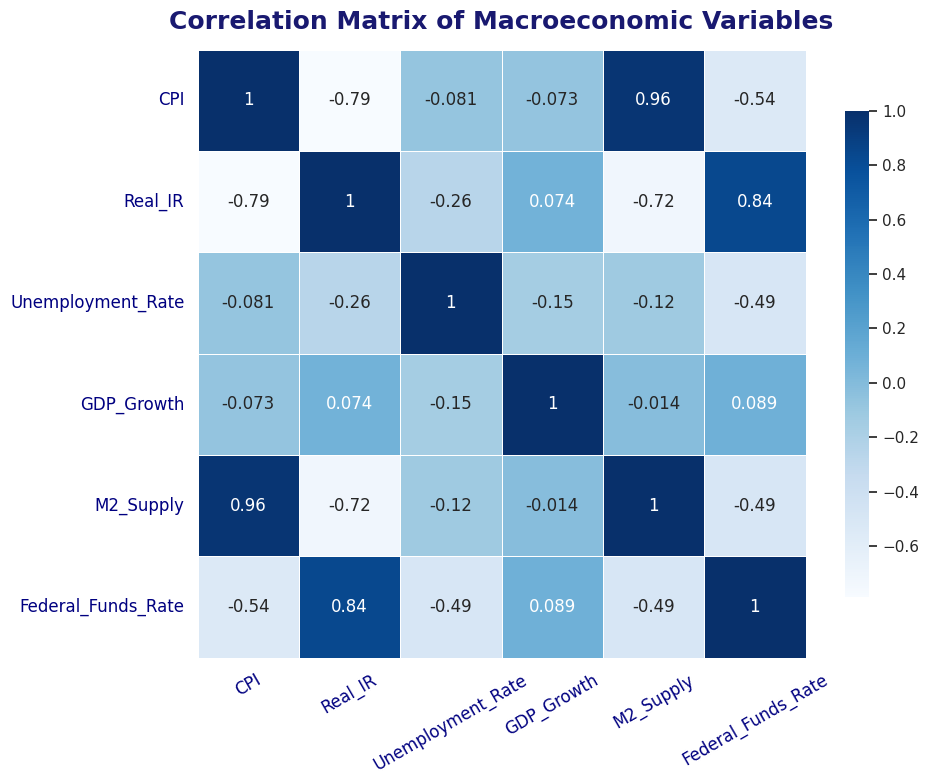

In [13]:
# Correlation matrix to define collinearity
corr_matrix = data[['CPI', 'Real_IR', 'Unemployment_Rate', 'GDP_Growth', 'M2_Supply', 'Federal_Funds_Rate']].corr()

# consulted gen ai for plot aesthetics & suppress warnings
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
plt.figure(figsize = (10, 8))
sns.set(font = 'Times New Roman')

sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'Blues', 
            linewidths = 0.5, 
            linecolor = 'white', 
            square = True, 
            cbar_kws = {'shrink': 0.8},
            annot_kws = {"size": 12})

plt.title('Correlation Matrix of Macroeconomic Variables', fontsize = 18, fontweight = 'bold', color = 'midnightblue', pad = 15)
plt.xticks(rotation = 30, fontsize = 12, color = 'navy')
plt.yticks(rotation = 0, fontsize = 12, color = 'navy')
plt.tight_layout()
plt.show()

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  Based on the correlation coefficient matrix, the only concerning correlation coefficients are between M2 Money Supply & CPI and Federal Funds Rate & Real Interest Rate. Given our four statistically significant variables — Unemployment Rate, GDP Growth, M2 Money Supply, and Federal Funds Rate — we will not be removing any variables, as all variables that are correlated with one another are not all statistically significant. 
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  After this analysis, we will proceed with a reduced Multiple Linear Regression model focusing on Unemployment Rate, GDP Growth, M2 Money Supply, and Federal Funds Rate.
</p>

In [14]:
# Identifying dependent and independent variables for reduced model
independent_variables_reduced = ['Unemployment_Rate', 'GDP_Growth', 'M2_Supply', 'Federal_Funds_Rate']

x_reduced = data[independent_variables_reduced]
x_constant = sm.add_constant(x_reduced) # Adding a constant value of x

In [15]:
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_constant, y, test_size = .20, shuffle = False)

# Running OLS for reduced model
reduced_model = sm.OLS(y_train_reduced, x_train_reduced).fit()

# printing reduced model summary results
print("==============================================================================")
print("               Reduced Model Train Multiple Linear Regression"                   )
print("==============================================================================")
print(reduced_model.summary())

               Reduced Model Train Multiple Linear Regression
                            OLS Regression Results                            
Dep. Variable:                 NASDAQ   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     182.1
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           3.49e-44
Time:                        17:48:06   Log-Likelihood:                -766.48
No. Observations:                 102   AIC:                             1543.
Df Residuals:                      97   BIC:                             1556.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  Based on our Multiple Linear Regression output for our reduced model, the R-squared value is 0.882. This means that Unemployment Rate, GDP Growth, M2 Money Supply, and Federal Funds Rate explain 88.2% of the variation in NASDAQ. Compared to our full model, the R-squared went down slightly, as we did reduce variables which still contained some predictive power.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  The coefficient values stayed relatively the same in terms of direction; however, Unemployment Rate went up in strength, GDP Growth went up in strength, M2 Money Supply went down in strength, Federal Funds Rate went up in strength. This was probably due to some variables being correlated with one another, and now OLS is more confident in their beta values.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  Intuitively, the coefficient direction is parallel with economic intuition, besides The Federal Funds Rate:
</p>

<div style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  <ul style="list-style-type: none; display: inline-block; text-align: left; padding-left: 0;">
    <li>&rarr; <strong>Unemployment Rate:</strong> As unemployment increases, this occurs during a contraction in the Business Cycle, which is in turn a negative impact on the overall health of the economy, and thus the stock market index of NASDAQ.</li>
    <li>&rarr; <strong>GDP Growth:</strong> Strong Gross Domestic Product per year signals a growing economy, which explains an increase in NASDAQ due to higher investor optimism and corporate earnings, especially with growing companies.</li>
    <li>&rarr; <strong>M2 Money Supply:</strong> A strong M2 value signals a boost in liquidity in the economy, which alters expectations and will ultimately lead to consumers buying more, and thus increasing NASDAQ.</li>
    <li>&rarr; <strong>Federal Funds Rate:</strong> An increase in the Federal Funds Rate signals to consumers that the economy is strong enough to handle these rates, ultimately increasing NASDAQ. Inuitively, this explination makes sense but it can also been seen that typically the Federal Funds Rate goes up when the economy may be in a weaker state, but it is all dependent on expectations.</li>
  </ul> We will then plot our Actual NASDAQ versus our Predicted NASDAQ using the test data.
</div>

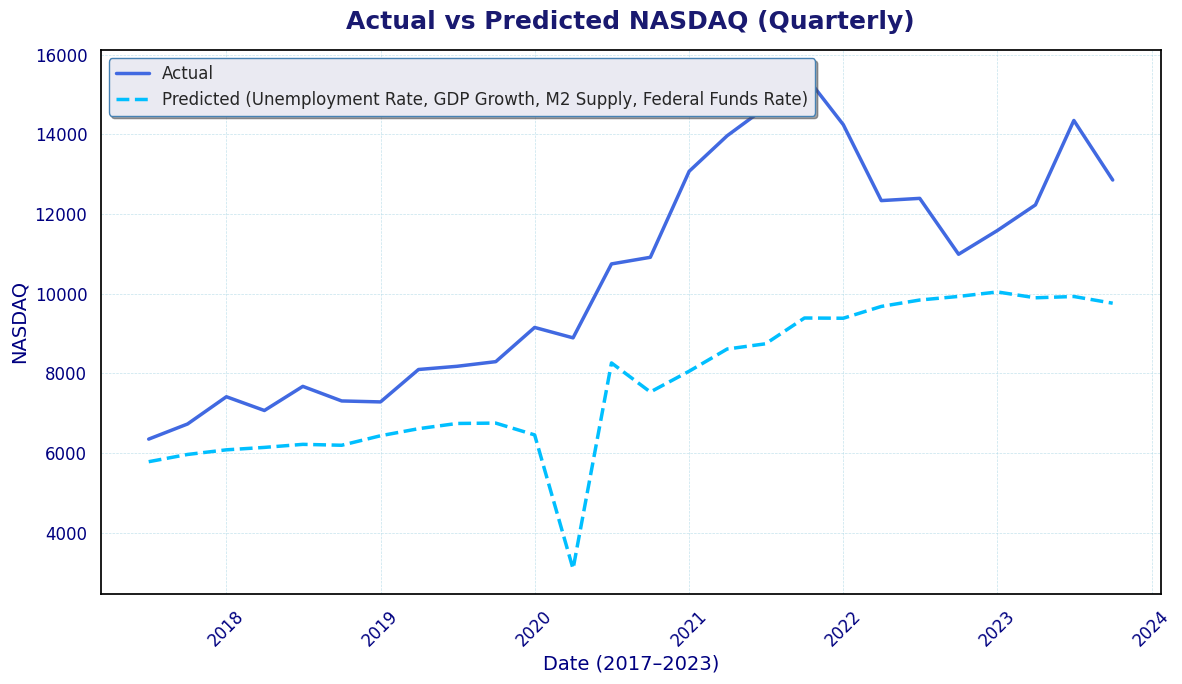

In [16]:
# Plotting Actual vs Predicted for NASDAQ
y_pred_reduced = reduced_model.predict(x_test_reduced)
mse_reduced = mean_squared_error(y_test_reduced, y_pred_reduced)
rmse_reduced = mse_reduced ** 0.5

data['Date'] = pd.to_datetime(data['Date'])
dates = data['Date'].iloc[x_test.index]

plt.figure(figsize = (12, 7))
plt.plot(dates, y_test_reduced.values, label = 'Actual', color = 'royalblue', linewidth = 2.5)
plt.plot(dates, y_pred_reduced.values, 
         label = 'Predicted (Unemployment Rate, GDP Growth, M2 Supply, Federal Funds Rate)', 
         color = 'deepskyblue', linewidth = 2.5, linestyle = '--')

plt.title('Actual vs Predicted NASDAQ (Quarterly)', fontsize = 18, fontweight = 'bold', pad = 15, color = 'midnightblue')
plt.xlabel('Date (2017–2023)', fontsize = 14, color = 'navy')
plt.ylabel('NASDAQ', fontsize = 14, color = 'navy')
plt.xticks(rotation = 45, fontsize = 12, color = 'navy')
plt.yticks(fontsize = 12, color = 'navy')

ax = plt.gca()
ax.set_facecolor('white') 
ax.figure.set_facecolor('white') 

for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.25)
    spine.set_color('black')

plt.grid(visible = True, linestyle = '--', linewidth = 0.5, alpha = 0.7, color = 'lightblue')
plt.legend(loc = 'upper left', fontsize = 12, frameon = True, shadow = True, edgecolor = 'steelblue')
plt.tight_layout()
plt.show()

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  This plot explains the actual NASDAQ values relative to our predicted NASDAQ values using the independent variables of Unemployment Rate, GDP Growth, M2 Money Supply, and Federal Funds Rate. In the earlier years prior to 2020, the model captured the general trend of NASDAQ but lacked the true magnitude. However, during 2020 with the COVID-19 pandemic, there was an extreme predicted decrease in NASDAQ, probably due to sudden and extreme changes in macroeconomic variables. However, during COVID-19 there was an increase in technology demand due to remote work and investor speculation, which aren't factors in macroeconomic variables. After 2020, the model still underestimates the magnitude of NASDAQ, and struggles to accurately find the true trend. 
</p>

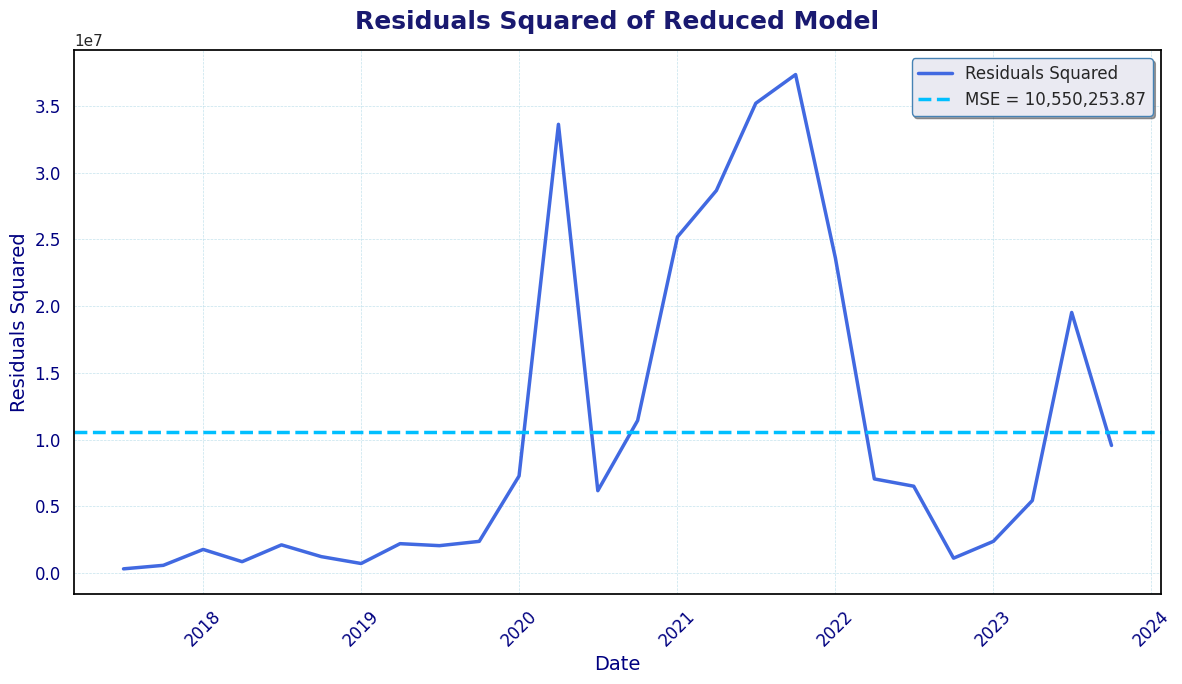

In [17]:
y_test_series_reduced = y_test.squeeze()
residuals_squared_reduced = (y_test_series_reduced - y_pred_reduced) ** 2

# Consulted gen ai for plot aesthetics
plt.figure(figsize = (12, 7))
plt.plot(dates, residuals_squared_reduced, label = 'Residuals Squared', color = 'royalblue', linewidth = 2.5)
plt.axhline(mse_reduced, label = f'MSE = {mse_reduced:,.2f}', 
            color = 'deepskyblue', linewidth = 2.5, linestyle = '--')

plt.title('Residuals Squared of Reduced Model', fontsize = 18, fontweight = 'bold', pad = 15, color = 'midnightblue')
plt.xlabel('Date', fontsize = 14, color = 'navy')
plt.ylabel('Residuals Squared', fontsize = 14, color = 'navy')
plt.xticks(rotation = 45, fontsize = 12, color = 'navy')
plt.yticks(fontsize = 12, color = 'navy')
plt.grid(visible = True, linestyle = '--', linewidth = 0.5, alpha = 0.7, color = 'lightblue')

for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.25)
    spine.set_color('black')


plt.gca().set_facecolor('white')
plt.legend(loc = 'upper right', fontsize = 12, frameon = True, shadow = True, edgecolor = 'steelblue')

plt.tight_layout()
plt.show()

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  A residual plot shows the difference between the actual and predicted values from a regression model. It highlights periods where the model performed well and where it struggled to reflect real market behavior.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  From 2017 to 2019, the residuals squared remain mostly below the MSE line, indicating that the model tracked NASDAQ performance with reasonable accuracy during the pre-pandemic period.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  In 2020–2021, residuals increase sharply as the model fails to capture the unique tech-driven surge in NASDAQ. While macroeconomic indicators pointed to a downturn, investor interest in technology stocks pushed the index higher, beyond what the model anticipated.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  From 2022 to 2023, residuals squared shift below and slightly above the MSE line. As post-pandemic conditions stabilized, the model began to more accurately reflect NASDAQ trends.
</p>

<div style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; width: 100%;">
  <p><strong>SOURCES</strong></p>
  <p>Referenced generative AI on April 19th, 2024:</p>
  <p><em>Prompt 1:</em> Given my initial plot code, may you improve this using matplotlib aesthetics and the color blue.</p>
  <p><em>Prompt 2:</em> Given this in a Jupyter markdown cell, can you format it using HTML?</p>
</div>